In [1]:
import pandas as pd
import numpy as np
from jupyter_utils import jupyter_setup, load_tracker
jupyter_setup()
import os
from evaluation_and_tracking import IDPerformanceTracker
import torch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

C:\Michi\acoustic_covid_detection\python


In [9]:
ID_PERFORMANCE_TRACKING = "003_find_confidently_misclassified.pickle"
id_performance = IDPerformanceTracker(ID_PERFORMANCE_TRACKING)
id_performance.df = id_performance.load()

In [10]:
id_performance.df.seed

0       66445511337
1       66445511337
2       66445511337
3       66445511337
4       66445511337
           ...     
5655       99468865
5656       99468865
5657       99468865
5658       99468865
5659       99468865
Name: seed, Length: 5660, dtype: object

In [11]:
id_performance.df.loss[0].mean()

0.05639434991435934

In [12]:
len(id_performance.df.ID.unique())

1208

In [27]:
id_performance.df["mean_loss"] = id_performance.df.loss.apply(lambda x: np.mean(x))

In [28]:
id_performance.df

,ID,label,loss,prediction,rec_type,seed,set_type,mean_loss
0,01OCEf1yB4czsq8ygRoT51s96Ba2,0.0,"[0.24268732964992523, 0.3430476784706116, 0.20...","[-1.292184829711914, -0.8934633135795593, -1.4...",combined_breaths,66445511337,eval,0.056394
1,0gB18cWHioTobGuU3qVE0QV5mBN2,0.0,"[0.9907708764076233, 0.6729903221130371, 0.845...","[0.5266850590705872, -0.04072827100753784, 0.2...",combined_breaths,66445511337,eval,1.404018
2,0HIgO2EhOOW1msCbEw1kC8Qsx6D3,0.0,"[0.2641008794307709, 0.43612903356552124, 0.51...","[-1.1964691877365112, -0.6038399338722229, -0....",combined_breaths,66445511337,eval,1.206764
3,0W7xMFW538WmDghkiujx2v4xVnt2,0.0,"[0.21719872951507568, 0.21513138711452484, 0.1...","[-1.4163784980773926, -1.4270128011703491, -1....",combined_breaths,66445511337,eval,0.050995
4,0xsz0lbpsoVgfojvTNSAjv9dhBq1,0.0,"[0.32570263743400574, 0.5105589628219604, 0.75...","[-0.954503059387207, -0.4061317443847656, 0.11...",combined_breaths,66445511337,eval,0.128096
...,...,...,...,...,...,...,...,...
5655,ZIzrdWNQK1Xhn6o6jrzSVBMdphp2,1.0,"[0.2555411159992218, 0.3425297737121582, 0.315...","[1.2338820695877075, 0.8952479362487793, 0.991...",combined_speech,99468865,eval,0.274414
5656,zLM432Aox7ZcmTXoglELTXNAVnf2,0.0,"[0.1430741846561432, 0.09366625547409058, 0.07...","[-1.872002363204956, -2.3208189010620117, -2.6...",combined_speech,99468865,eval,0.015537
5657,Zmjv6hT2Q1VfJhGdGh9VkGmpHL03,1.0,"[0.03637336939573288, 0.0567362904548645, 0.07...","[3.295677423477173, 2.840839147567749, 2.50400...",combined_speech,99468865,eval,0.016772
5658,ZnfFHbrHryWzAq27TCTQtY7uWTm1,0.0,"[0.07010428607463837, 0.09686196595430374, 0.1...","[-2.6225152015686035, -2.2856459617614746, -2....",combined_speech,99468865,eval,0.083311


(0.0, 200.0)

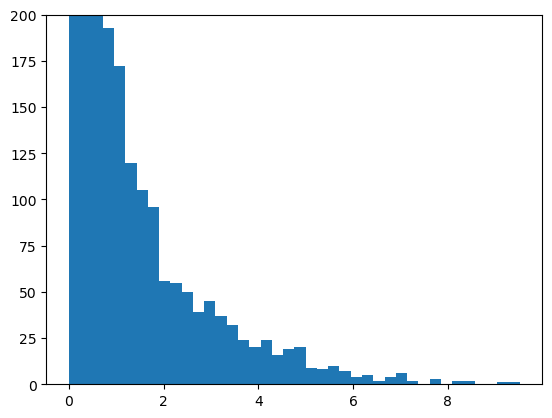

In [16]:
plt.hist(temp, 40)
plt.ylim([0, 200])

In [102]:
min_threshold = 1
mean_threshold = 2
confidently_misclassified = []
mean_mean_loss = []
for participant_id in id_performance.df.ID.unique():
    
    mean_loss = id_performance.df[id_performance.df.ID == participant_id]["mean_loss"].values
    
    # print(np.mean(mean_loss), np.max(mean_loss))
    if np.min(mean_loss) > min_threshold and np.mean(mean_loss) > mean_threshold:
        confidently_misclassified.append(participant_id)
        mean_mean_loss.append(np.mean(mean_loss))
        # print(np.mean(mean_loss))
        # print(id_performance.df[id_performance.df.ID == participant_id][["mean_loss", "rec_type"]])
len(confidently_misclassified)

85

In [103]:
save_df = pd.DataFrame(confidently_misclassified, columns=["ID"])
# save_df

In [104]:
save_df.to_excel("data/Coswara_processed/id_performance_tracking/01_detected_confident_misclassifiactions.xlsx", index=False)

In [105]:
save_df = pd.DataFrame(mean_mean_loss, columns=["mean_loss"])
# save_df

In [106]:
save_df.to_excel("data/Coswara_processed/id_performance_tracking/01_detected_confident_misclassifiactions_temp.xlsx", index=False)

In [107]:
loaded_df = pd.read_excel("data/Coswara_processed/id_performance_tracking/01_detected_confident_misclassifiactions.xlsx")
loaded_df

,ID,mean_loss
0,1PhqsVP6EhPzs1zx9XUsyj7nm823,3.736882
1,4bnHQCj8tnSEx37AR5HiQAH2vB32,5.308893
2,4Zg768BEWlXeVeUynZPu5jF1XOX2,2.193960
3,5DyIJHOcbJMeaKMPWDDA3z2Z0qF3,3.186142
4,acIbMRC49hR4GPLAAn7NT5du7rn2,2.891223
...,...,...
80,E2F521LDB7aZdAkwmcfDb2CLQ7l2,3.203685
81,C1h80BY2J5eZgP3UMb4PTJXyKWy2,5.234104
82,ZIuG3ACI2aQ7spKg26hQM9nxFWi1,2.824793
83,CAlwzhQrNYT72NAfkAOpXNoLJrM2,2.605818


In [109]:
len(loaded_df[loaded_df.mean_loss > 3])

52